# COVID-19 Data Analysis with Python

This project analyzes COVID-19 trends across the globe using real-time data. It uses **Pandas** and **Matplotlib** to extract insights like daily case trends, country-wise stats, and moving averages. Charts and visualizations help understand the spread and recovery rate of the pandemic.


## 1.Import Required Libraries

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

## 2. Load and Preview the Dataset

We load the COVID-19 dataset and convert the `Date` column to datetime format for time-based analysis.


In [2]:
#Basic style for Matplotlib
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['axes.grid'] = True

#Load dataset
df = pd.read_csv("mock_covid_data.csv")
df['Date'] = pd.to_datetime(df['Date'])

#preview
df.head()

,Date,Country,Confirmed,Deaths,Recovered
0,2020-01-01,India,202,2,100
1,2020-01-02,India,737,9,367
2,2020-01-03,India,1697,22,845
3,2020-01-04,India,2067,27,1029
4,2020-01-05,India,2273,30,1131


## 3. Understand the Structure of the Dataset

Let's inspect the dataset to understand the number of rows, columns, data types, and missing values.


In [3]:
# Dataset shape and basic info
print("Shape of dataset:", df.shape)
print("\nData types and non-null values:")
df.info()

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Shape of dataset: (500, 5)

Data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       500 non-null    datetime64[ns]
 1   Country    500 non-null    object        
 2   Confirmed  500 non-null    int64         
 3   Deaths     500 non-null    int64         
 4   Recovered  500 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 19.7+ KB

Missing values in each column:
Date         0
Country      0
Confirmed    0
Deaths       0
Recovered    0
dtype: int64


## 4. Descriptive Statistics

We now view summary statistics of the numerical columns to understand the distribution and data ranges.


In [4]:
# Descriptive statistics
df.describe()


,Date,Confirmed,Deaths,Recovered
count,500,500.000000,500.000000,500.000000
mean,2020-02-19 12:00:00,27799.684000,647.074000,15026.212000
min,2020-01-01 00:00:00,202.000000,2.000000,100.000000
25%,2020-01-25 18:00:00,13920.000000,290.500000,7145.250000
50%,2020-02-19 12:00:00,27468.000000,573.000000,14379.000000
75%,2020-03-15 06:00:00,41793.000000,933.000000,21721.000000
max,2020-04-09 00:00:00,57862.000000,2023.000000,39480.000000
std,NaN,16194.941997,446.380887,9323.547354


## 5. Global COVID-19 Trends Over Time

We aggregate global totals of confirmed, recovered, and death cases by date and visualize them using a line plot.


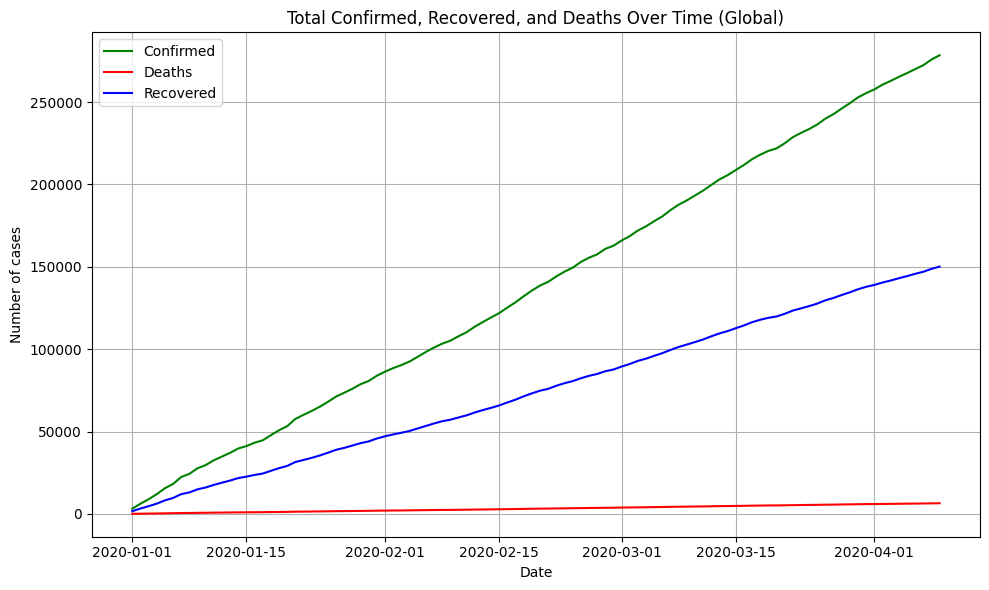

In [5]:
# Summarize total cases globally by date
global_df = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

#plot
plt.plot(global_df['Date'], global_df['Confirmed'], label='Confirmed', color='green')
plt.plot(global_df['Date'], global_df['Deaths'], label='Deaths', color='red')
plt.plot(global_df['Date'], global_df['Recovered'], label='Recovered', color='blue')
plt.title('Total Confirmed, Recovered, and Deaths Over Time (Global)')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.legend()
plt.tight_layout()
plt.show()

## 6. Country-wise COVID-19 Stats (Latest Date)

This section filters the latest available data and compares confirmed, recovered, and death cases across different countries using a bar chart.


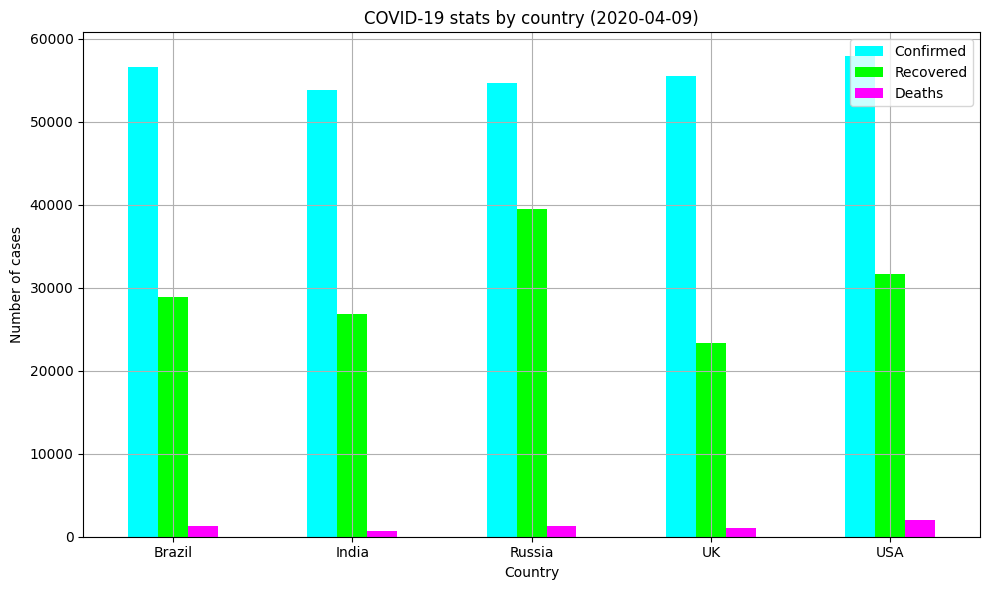

In [6]:
#Get latest date's data
latest_date = df['Date'].max()
latest_df = df[df['Date'] == latest_date]

#Group by country
country_data = latest_df.groupby('Country')[['Confirmed', 'Recovered', 'Deaths']].sum()

#Bar chart
country_data.plot(kind='bar', color=['cyan', 'lime','magenta'])
plt.title(f"COVID-19 stats by country ({latest_date.date()})")
plt.xlabel('Country')
plt.legend()
plt.ylabel('Number of cases')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 7. India: 7-Day Moving Average of Confirmed Cases

To observe trends more clearly, we calculate the 7-day moving average of confirmed cases in India and visualize it along with the daily confirmed cases.


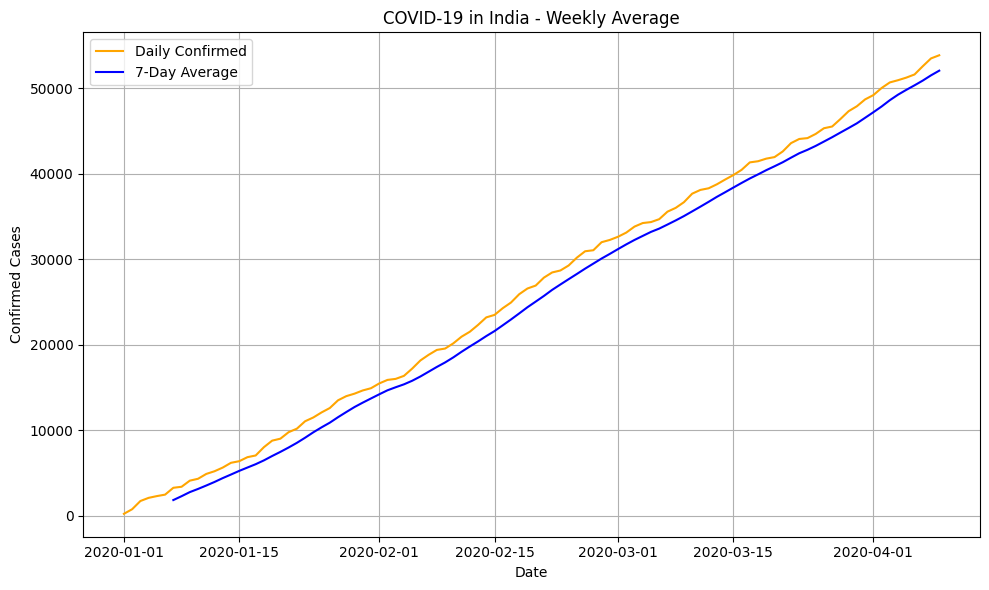

In [7]:
# Filter data for India
india_df = df[df['Country'] == 'India'].sort_values('Date')

# Calculate 7-day Average
india_df['Weekly Average'] = india_df['Confirmed'].rolling(window=7).mean()

# Plot
plt.plot(india_df['Date'], india_df['Confirmed'], label='Daily Confirmed', color='orange')
plt.plot(india_df['Date'], india_df['Weekly Average'], label='7-Day Average', color='blue')
plt.title("COVID-19 in India - Weekly Average")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.tight_layout()
plt.show()


## 8. Recovery vs Death Ratio in India (Pie Chart)

We visualize the share of recovered and death cases in India using the latest available data through a pie chart.


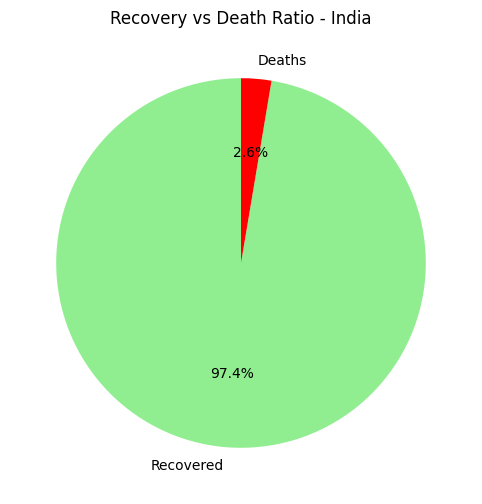

In [8]:
# Get latest record for India
latest_india = india_df[india_df['Date'] == latest_date].iloc[0]
recovered = latest_india['Recovered']
deaths = latest_india['Deaths']

# Pie chart
plt.pie([recovered, deaths], labels=['Recovered', 'Deaths'], autopct='%1.1f%%',startangle=90, colors=['lightgreen', 'red'])
plt.title("Recovery vs Death Ratio - India")
plt.show()


## 9. Conclusion

This project demonstrated how to use Python (Pandas, Matplotlib) for analyzing real-world COVID-19 data. We visualized global and country-level trends, calculated moving averages, and explored recovery vs mortality rates. This type of analysis is essential in understanding public health dynamics.
